<a href="https://colab.research.google.com/github/janpeter19/BPL_IEC_operation/blob/main/BPL_IEC_operation_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_IEC_operation script with PyFMI

The key library PyFMI is installed.

After the installation a small application BPL_IEC_operation is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh 
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local 
import sys 
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2023-03-29 12:15:50--  https://repo.anaconda.com/miniconda/Miniconda3-py39_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69888122 (67M) [application/x-sh]
Saving to: ‘Miniconda3-py39_23.1.0-1-Linux-x86_64.sh’

Miniconda3-py39_23. 100%[===================>]  66.65M   144MB/s    in 0.5s    

2023-03-29 12:15:50 (144 MB/s) - ‘Miniconda3-py39_23.1.0-1-Linux-x86_64.sh’ saved [69888122/69888122]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: done
Executing transaction: done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39h06a4308_0         426 KB
    conda-23.3.0               |   py39h06a4308_0         962 KB
    cryptography-39.0.1        |   py39h9ce1e76_0         1.4 MB
    openssl-1.1.1t             |       h7f8727e_0         3.7 MB
    packaging-23.0             |   py39h06a4308_0          68 KB
    pyopenssl-23.0.0           |   py39h06a4308_0          96 KB
    requests-2.28.1            |   py39h06a4308_1          99 KB
    sqlite-3.41.1              |       h5eee18b_0         1.2 MB
    tqdm-4.65.0                |   py39hb070fc8_0         131 KB
    zstandard-0.19.0           |   py39h5eee18b_0         474 KB
    ------------------------------------------------------------
                   

In [ ]:
!conda --version
!python --version

conda 23.3.0
Python 3.9.16


In [ ]:
!conda install -c conda-forge pyfmi --yes # Install the key package

Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyfmi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    assimulo-3.4               |   py39h5c5a87b_0         1.9 MB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    conda-23.3.0               |   py39hf3d152e_0         922 KB  conda-forge
    fmilib-2.4.1               |       h27087fc_0         545 KB  conda-forge
    gmp-6.2.1                  |       h58526e2_0         806 KB  conda-forge
    icu-58.2                   |    hf484d3e_1000        22.6 MB  conda-forge
    libblas-3.9.0              |

# Notes of BPL_IEC_operation


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_IEC_Column_system_linux_om_me
* Setup-file - BPL_IEC_explore

In [ ]:
%%bash 
git clone https://github.com/janpeter19/BPL_IEC_operation

Cloning into 'BPL_YEAST_AIR_Fedbatch'...


In [ ]:
%cd BPL_IEC_operation

/content/BPL_YEAST_AIR_Fedbatch


# BPL_IEC_operation

Authors: Karl Johan Brink and Jan Peter Axelsson

In this notebook we show operation of a typical ion-exchange chromatography step.
The impact of pH is also illustrated. 

The model is based on the simplified model [1].

In [ ]:
run -i BPL_IEC_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [36/2.54, 30/2.54]

## Typical parameters for a pilot scale  ion exchange chromatography column process setup

In [ ]:
# From  given colunn height (h) diameter (d) and linear flow rate (lfr)
# actual column volume (V) and volume flow rate (VFR) are calculated below.

from numpy import pi
h = 20.0
d = 1.261
a = pi*(d/2)**2
V = h*a
print('V =', np.round(V,1), '[mL]')

lfr = 48
VFR = a*lfr/60
print('VFR =', np.round(VFR,1), '[mL/min]')                                   # Pump schedule parameter 


V = 25.0 [mL]
VFR = 1.0 [mL/min]


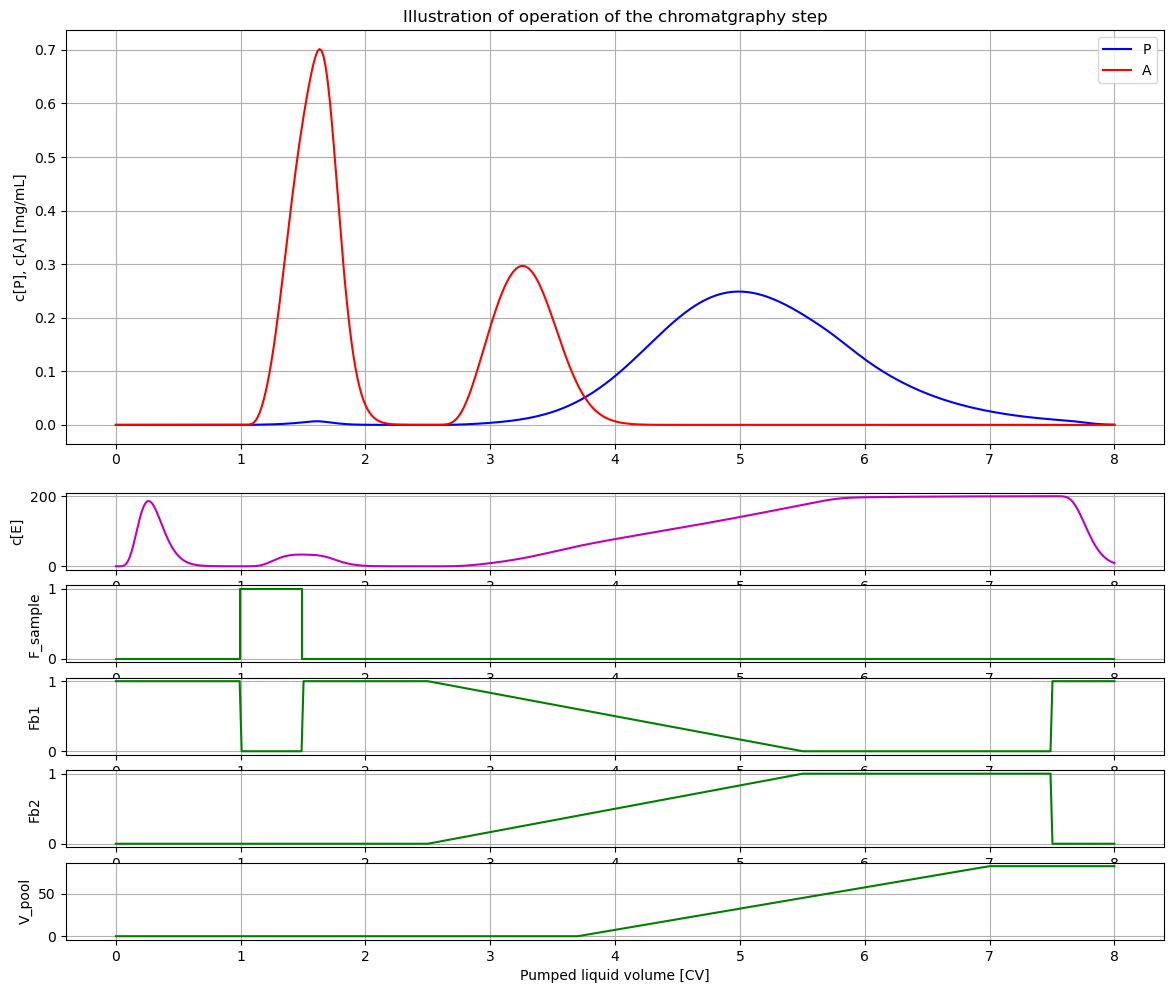

In [ ]:
# Sample concentration product P_in and antagonist A_in
par(P_in = 1.0)
par(A_in = 1.0)

# Column properties are described by the size and binding capacity of the resin Q_av
par(height = h)
par(diameter = d)
par(Q_av = 6.0)

# Remaining salt koncentration in the column from prvious batch and eliminated during the initial equilibration period
init(E_0 = 50)

# Salt koncentration of the desorption buffer
par(E_in_desorption_buffer = 8.0)

# Flow rate rate through the 
par(LFR=lfr)

# Switching points during operation are conveniently described in terms of multiples of the column volume V
CV_ekv = 1.0
CV_ads = 0.5
CV_wash = 1.0
CV_desorb = 3.0
CV_start_pool = 1.2
CV_stop_pool = 4.5
CV_wash2 = 2.5
par(scale_volume=True, start_adsorption=CV_ekv*V, stop_adsorption=(CV_ekv+CV_ads)*V)
par(start_desorption=(CV_ekv+CV_ads+CV_wash)*V, stationary_desorption=(CV_ekv+CV_ads+CV_wash+CV_desorb)*V)
par(stop_desorption=7.5*V)
par(start_pooling=(CV_ekv+CV_ads+CV_wash+CV_start_pool)*V, stop_pooling=(CV_ekv+CV_ads+CV_wash+CV_stop_pool)*V)

# Simulation and plot of results
newplot(title='Illustration of operation of the chromatgraphy step', plotType='Elution-conductivity-vs-CV-combined-all')
simu((CV_ekv+CV_ads+CV_wash+CV_desorb+CV_wash2)*V/VFR)

Comments of steps of operations:

1) Time: 0-1 hours - equilibration. Just to illustrate the equilibration process the first part of the column is given an initial value of salt concentration.

2) Time: 1-1.5 hours - sample is loaded on the column. The product P is adsorbed to the columne and just a small amount passes through and goes to the waste. The antagonist A is much less adsrobed.

3) Time: 1.5-2.5 hours - washing 1. The column comes to equilibrium and both antagonist and product comes down to low levels.

4) Time: 2.5-5.5 hours - desorption. A linear gradient of increaseing salt concentration is applied. First the antagonist and later the product comes out.

5) Time: 5.5-7.5 hours - washing 2 The The column has constant salt concentration and stationary desorption. 

6) Time: 3.7-7.0 hours - pooling of product. The start- and stop of pooling are chosen with trade-off between maximizing the product pooled and minimize the amount of antagonist in the pooling.

7) Time: 7.5-8.0 hours - desorption stopped and salt is washed out and preparation of the next batch to come.

Note that step 4 and 5 is parallel to step 6.

In [ ]:
# Check mass-balance of P and A
P_mass = model.get('tank_harvest.m[1]') + model.get('tank_waste.m[1]')
A_mass = model.get('tank_harvest.m[2]') + model.get('tank_waste.m[2]')
print('P_mass [mg] =', P_mass)
print('A_mass [mg] =', A_mass)

P_mass [mg] = [12.42212131]
A_mass [mg] = [12.48878113]


These values should be compared with the expected value 12.5 mg, i.e. half a column volume with sample concentration 1 mg/L. The difference is due to numerical errors during simulation. 

## Impact of change of binding strength due to pH

There are many factors that contribute to the binding strength. A most important factor is the pH-value of the resin and the characteristic iso-electric point of the protein. The binding strenght can be seen as proportional to the difference.

The binding strength of the resin is described by the quotient KP=k1/k2 for the protein P and similarly KA=k3/k4 for the protein A, see [1].

In [ ]:
# Define function that describe the proportionality of binding strength ot 
# the pH difference of the iso-electric point and the resin

def KP_pH_sensitivity(pI_P=8.0, pH_resin=7.0):
    K_P_nom = 0.0
    coeff_pH = 6.0
    return K_P_nom + coeff_pH*(pI_P-pH_resin)

def KA_pH_sensitivity(pI_A=7.1667, pH_resin=7.0):
    K_A_nom = 0.0
    coeff_pH = 1.0
    return K_A_nom + coeff_pH*(pI_A-pH_resin)

8.734962282491175 mg
11.650336668377646 mg
11.769880456133375 mg


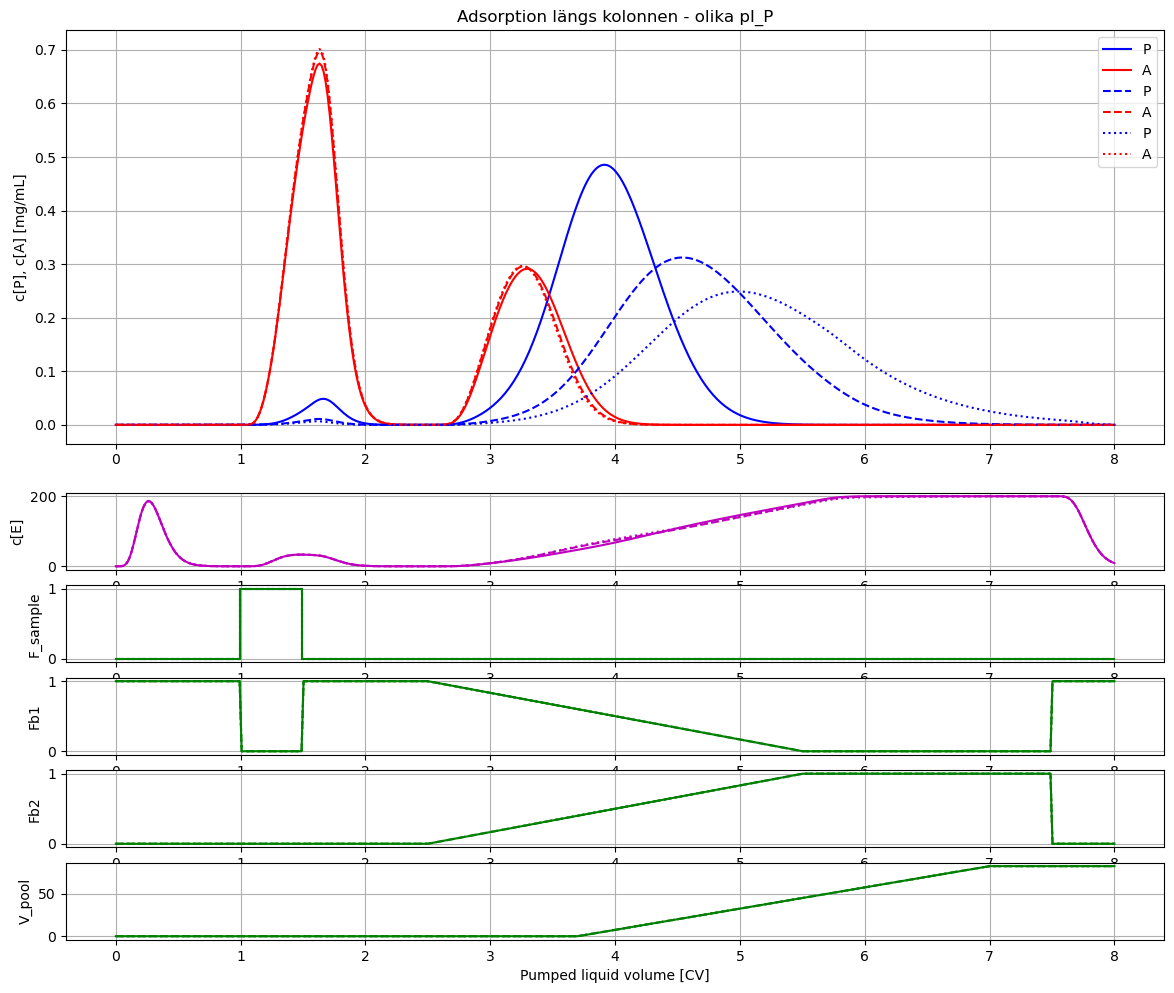

In [ ]:
# Let us investigate the impact of change of the iso-electric pH for protein P

# Default value of TP
TP=3.33

# Simulate and plot the results
newplot(title='Adsorption längs kolonnen - olika pI_P', plotType='Elution-conductivity-vs-CV-combined-all')

for value in [7.2, 7.6, 8.0]:  
    par(k2 = 1/(TP*KP_pH_sensitivity(pI_P=value, pH_resin=7.0))); 
    simu((CV_ekv+CV_ads+CV_wash+CV_desorb+CV_wash2)*V/VFR)
    print(sim_res['tank_harvest.m[1]'][-1], 'mg')

# Restore default values
par(k2 = 1/(TP*KP_pH_sensitivity(pI_P=8.0)))  

## Summary

The simplified simulation model was found useful to describe operational aspects of ion exchange cromtography.
The model describe qualitatively well the impact of typical operational changes in flow rate. 

## Acknowledgement

The author thank Karl Johan Brink for sharing his know-how of chromatography operation. 
He has especially given input of how to parametrize the model in terms often used in the industry and provided typical values used here.

## References

1) Månsson, Jonas, "Control of chromatography comlumn in production scale", Master thesis TFRT-5599, Department of Automatic Control, LTH, Lund Sweden, 1998.
2) Pharmacia LKB Biotechnology. "Ion Exchange chromatography. Principles and Mathods.", 3rd edition, 1991.

## Appendix

In [ ]:
system_info()


System information
 -OS: Windows
 -Python: 3.10.6
 -Scipy: not installed in the notebook
 -PyFMI: 2.10.0
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL_IEC.Column_system
 -Generated: 2023-04-21T12:28:38
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore version 0.9.7
